# Binary Classification EDA -> Preprocessing -> Model Training

## EDA

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [2]:
# loading DataSet
df = pd.read_csv("train.csv")
df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [3]:
# Data Overview
print(f"Shape: {df.shape}")
print(df.info())

Shape: (750000, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 103.0+ MB
None


In [4]:
# dropping unnecessary id column
df = df.drop('id', axis=1)


In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
# Column Types

num_cols = df.select_dtypes(include = ['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include =['object']).columns.tolist()


In [7]:
# missing values

missing = df.isnull().sum()
print("Missing avlues: \n", missing[missing > 0])

Missing avlues: 
 Series([], dtype: int64)


Class Distribution : 
 y
0    659512
1     90488
Name: count, dtype: int64
Class ratio: 0.1372


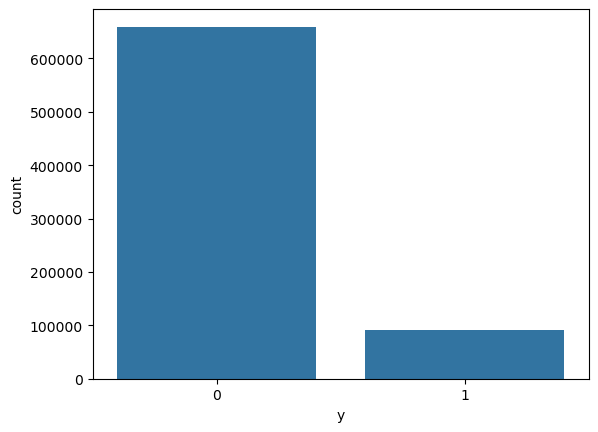

In [8]:
# Target Distribution

target_counts = df['y'].value_counts()
print(f"Class Distribution : \n {target_counts}")
print(f"Class ratio: {target_counts[1]/target_counts[0]:.4f}")
sns.countplot(x = 'y', data = df)
plt.show()

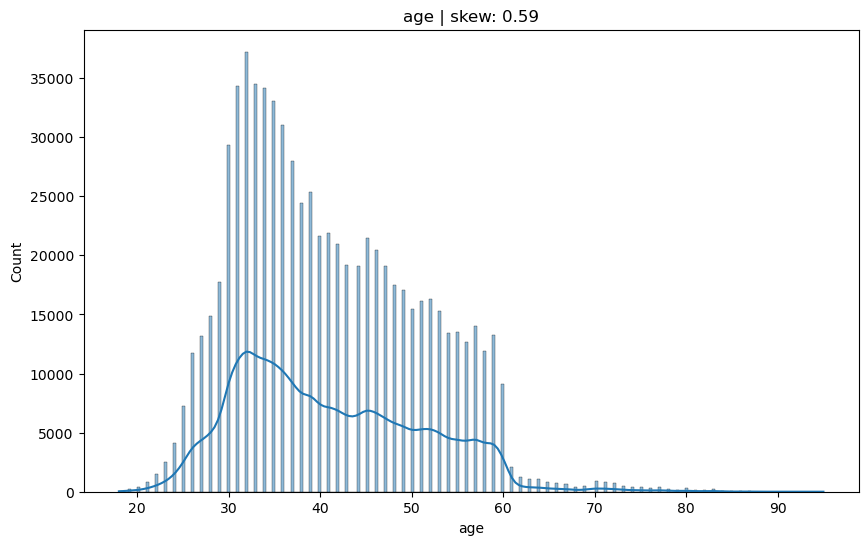

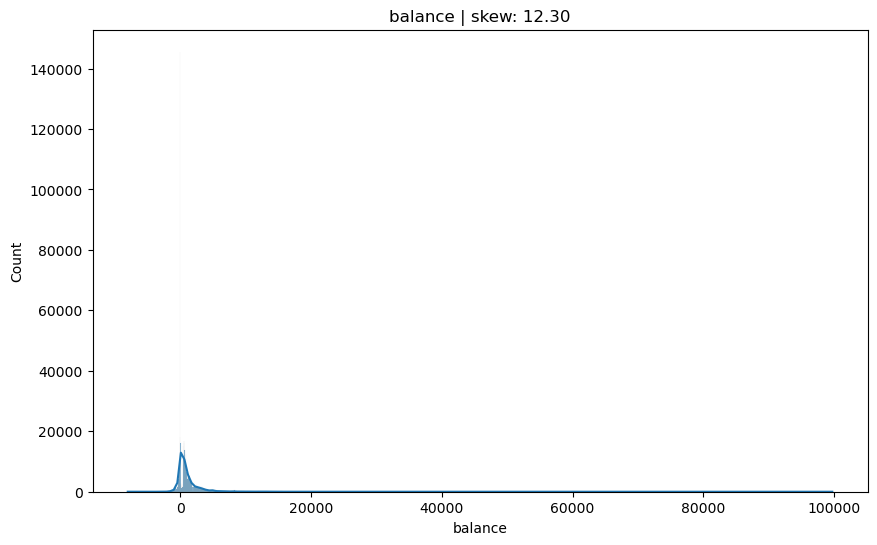

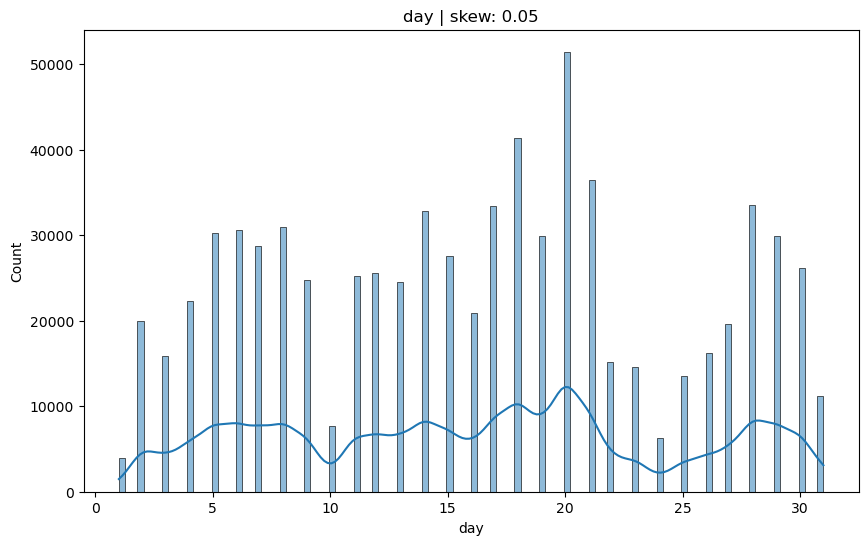

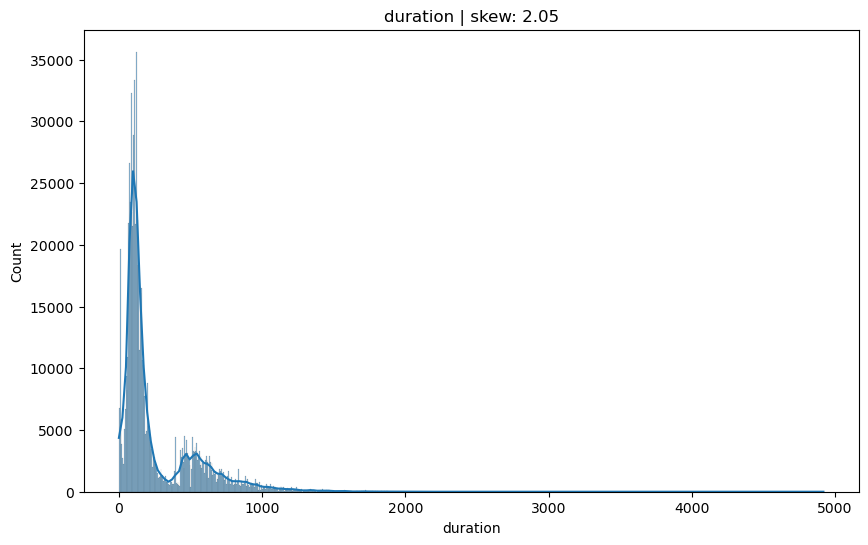

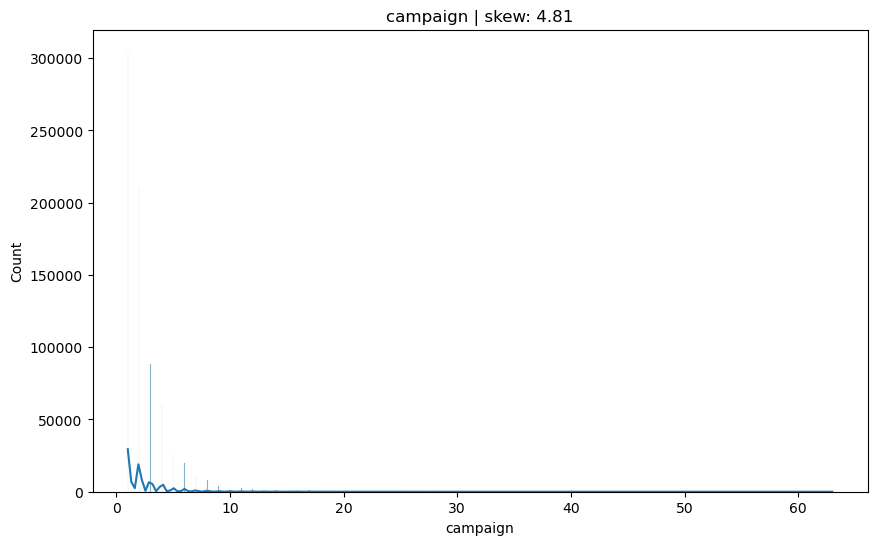

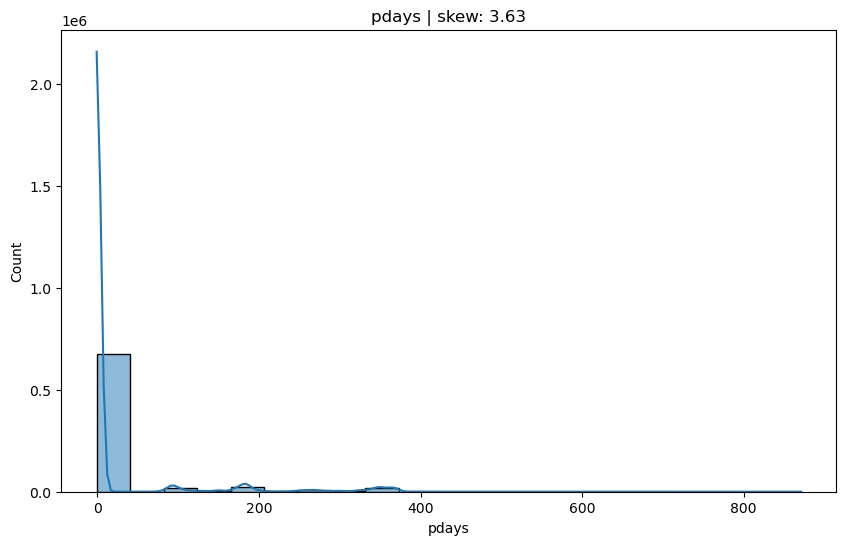

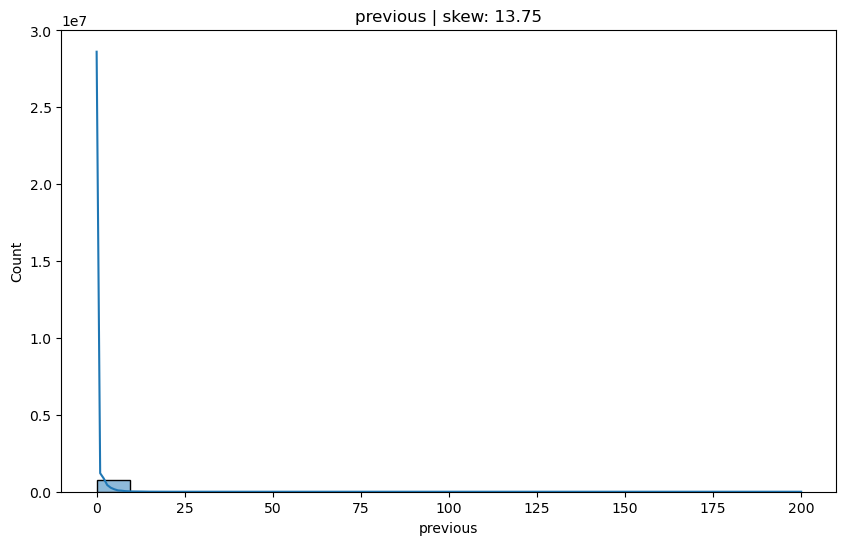

In [9]:
# Numerical distribution + skewness

for col in num_cols:
    if col != 'y':
        plt.figure(figsize = (10, 6))
        sns.histplot(df[col], kde = True)
        plt.title(f"{col} | skew: {df[col].skew():.2f}")
        plt.show()

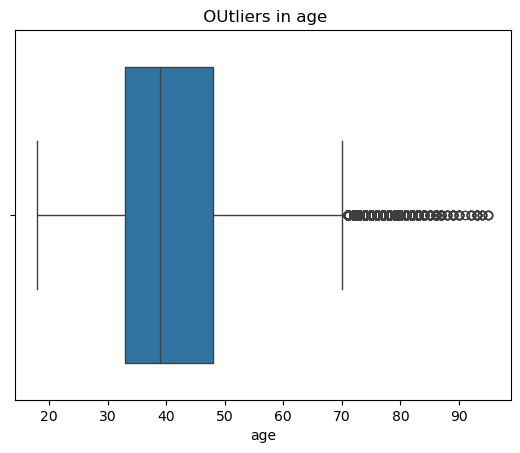

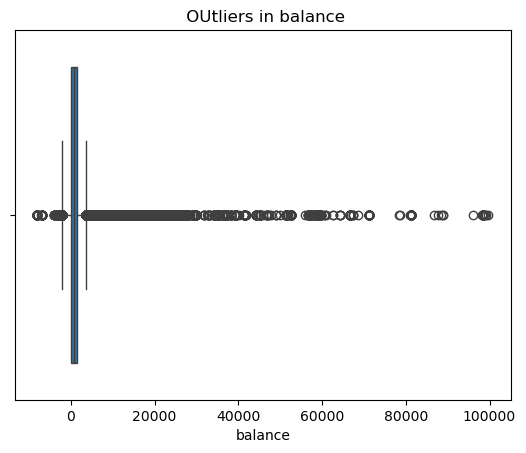

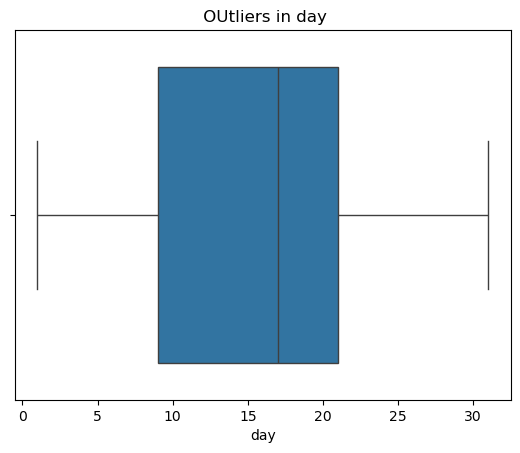

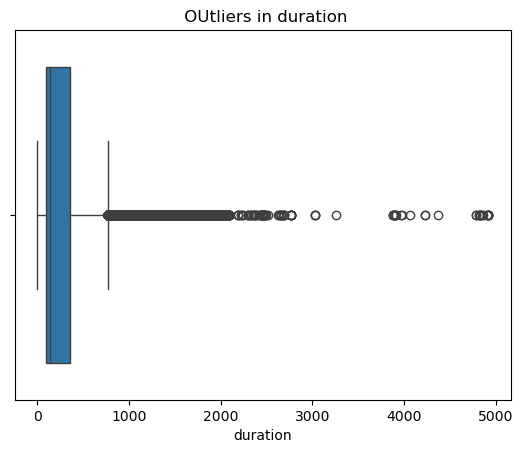

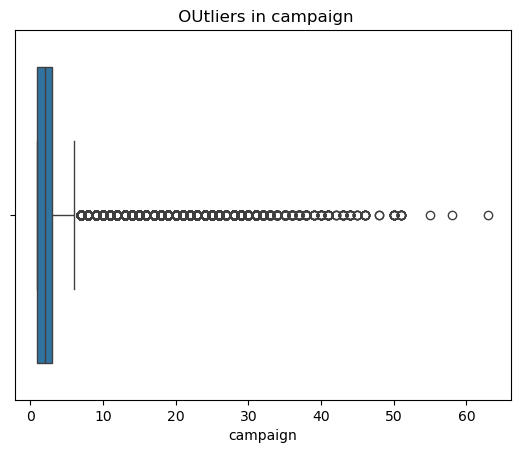

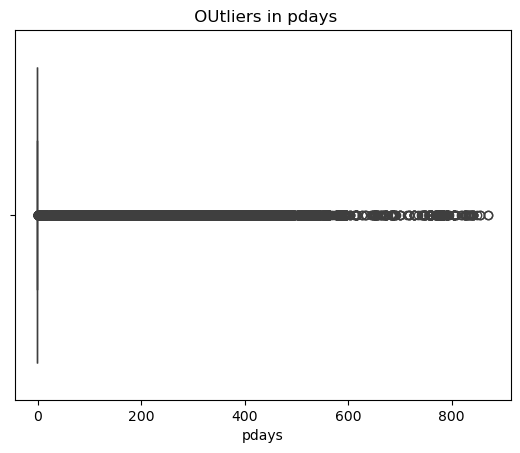

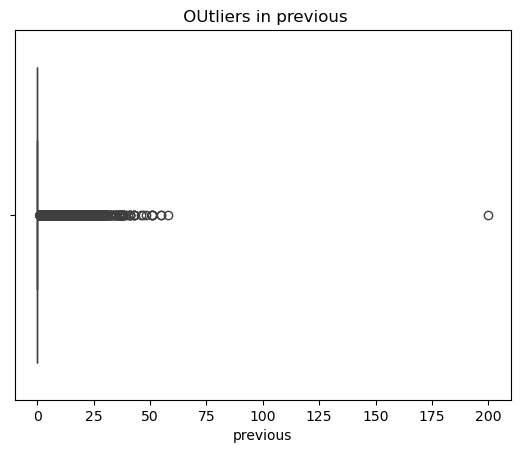

In [10]:
# Outlier Detection

for col in num_cols:
    if col != 'y':
        sns.boxplot(x = df[col])
        plt.title(f" OUtliers in {col}")
        plt.show()

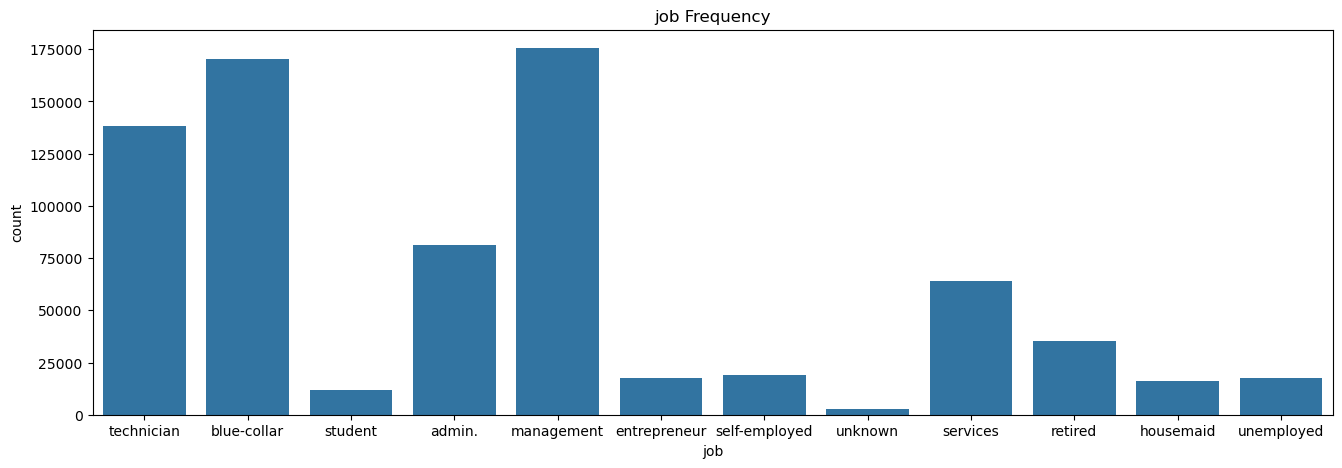

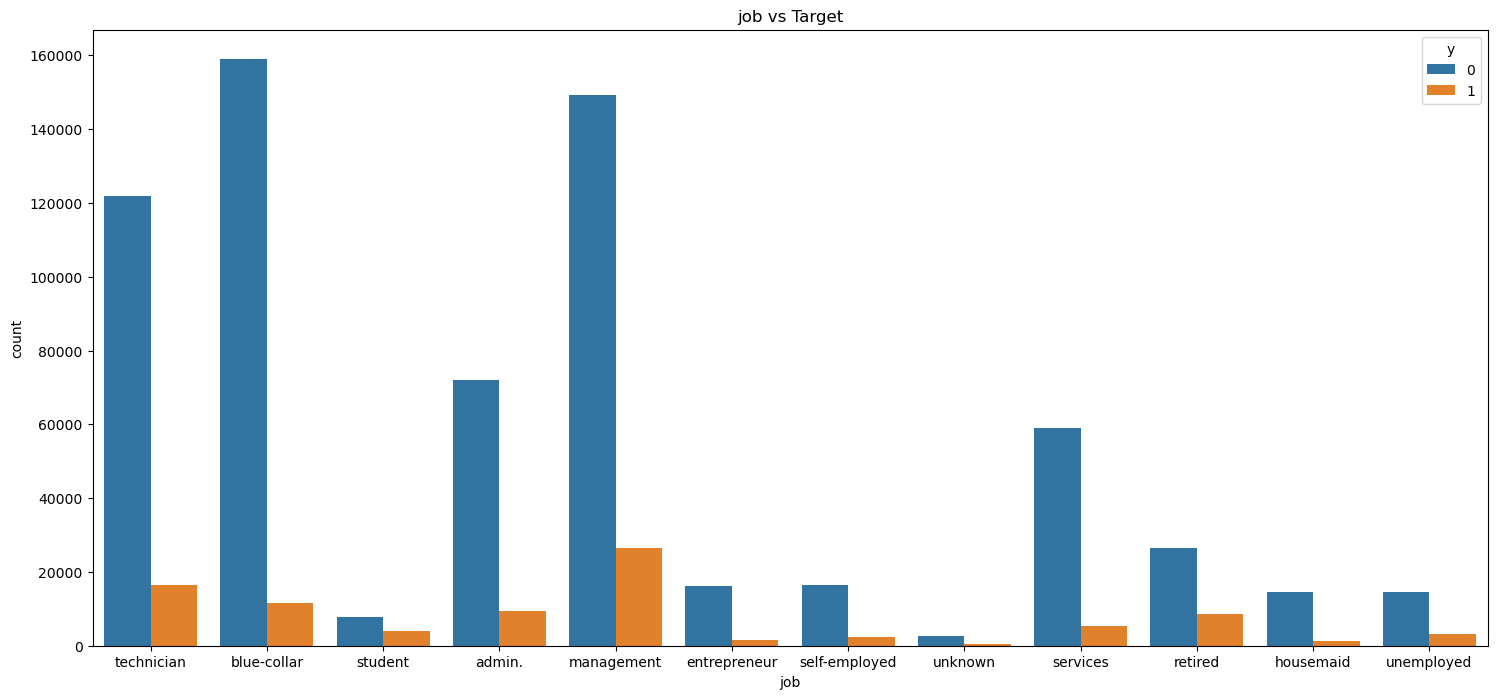

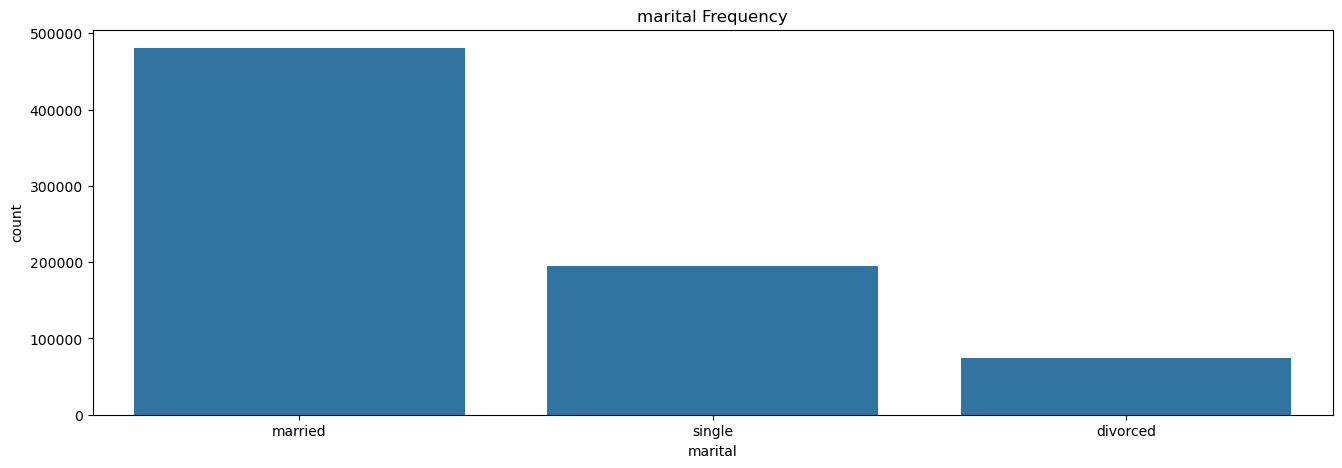

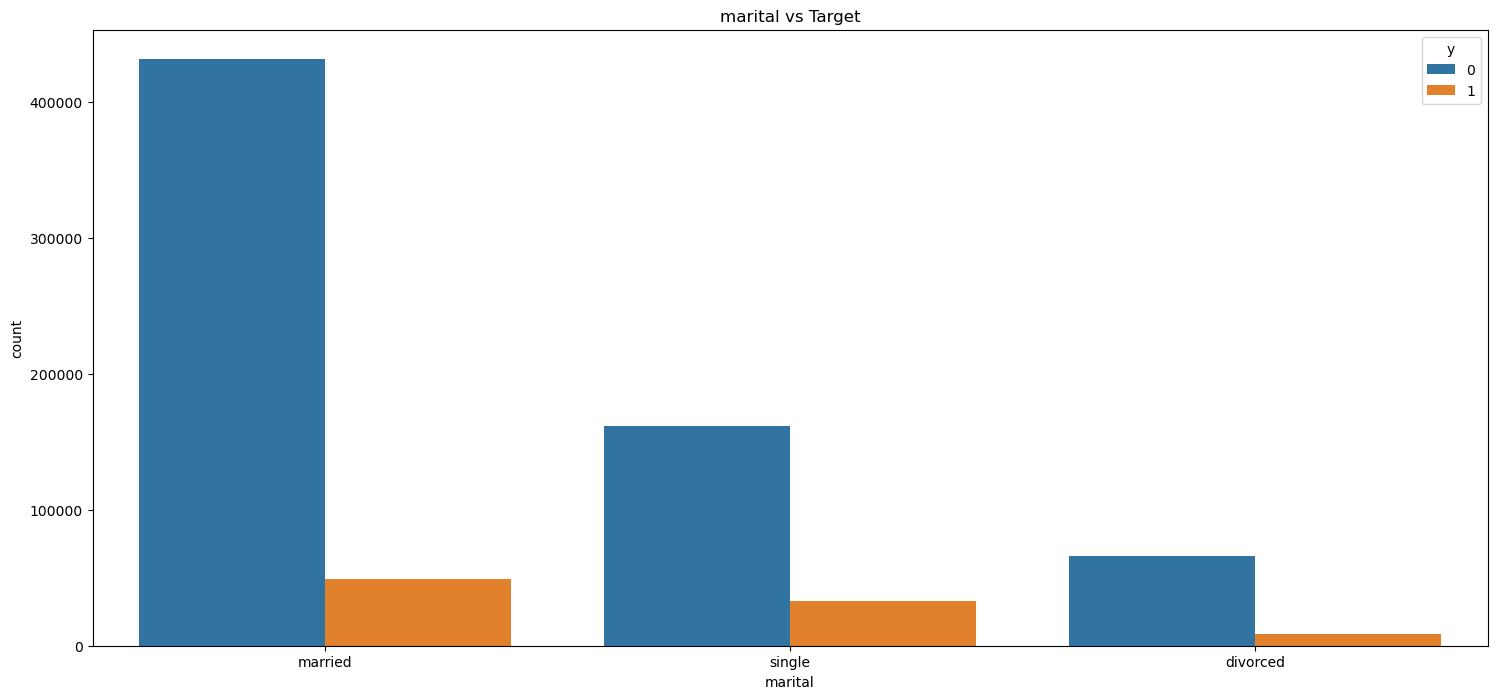

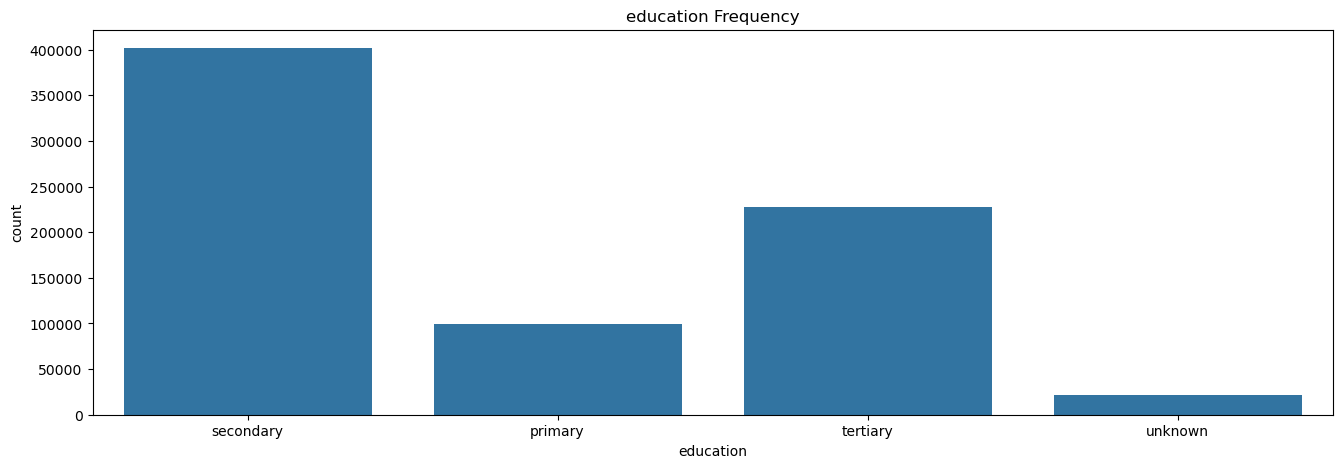

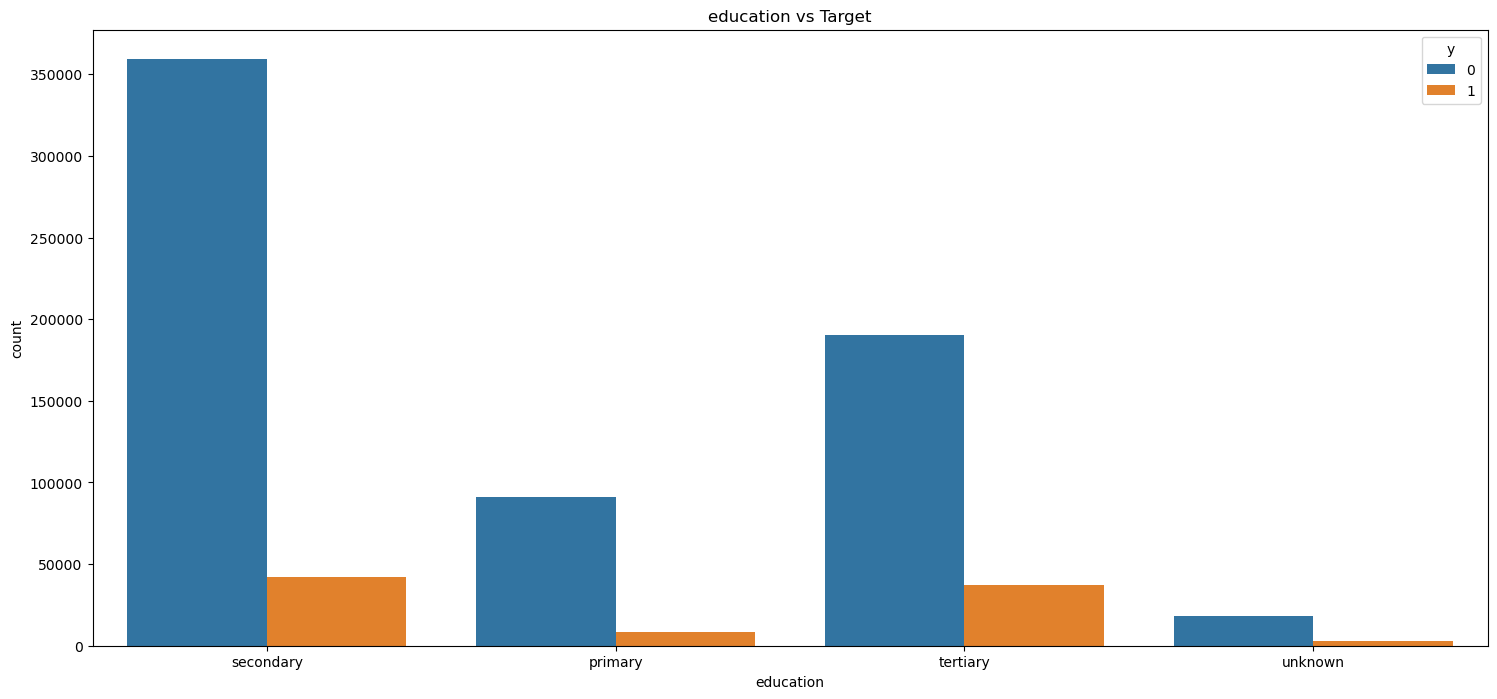

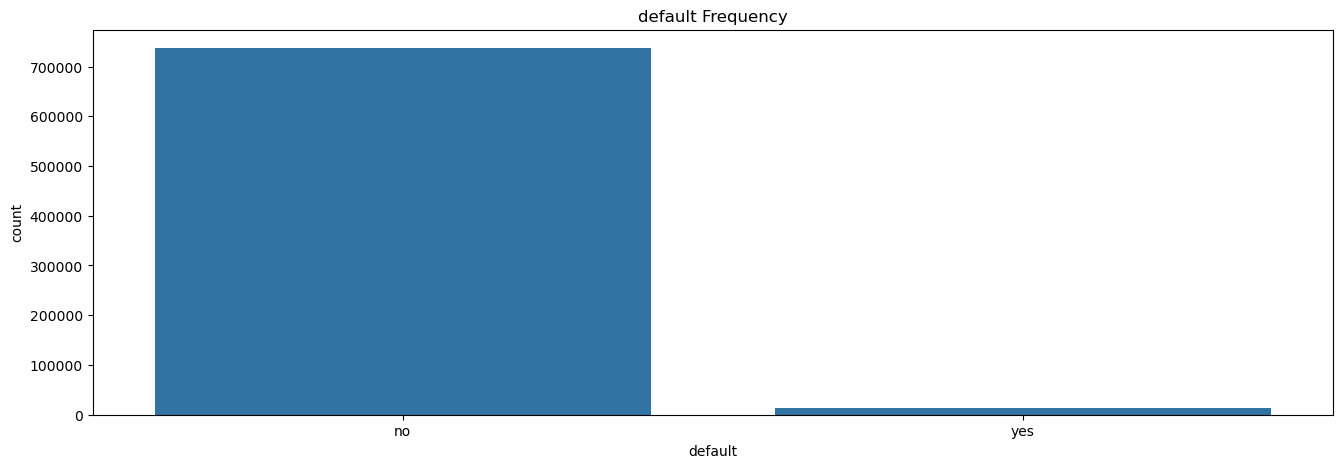

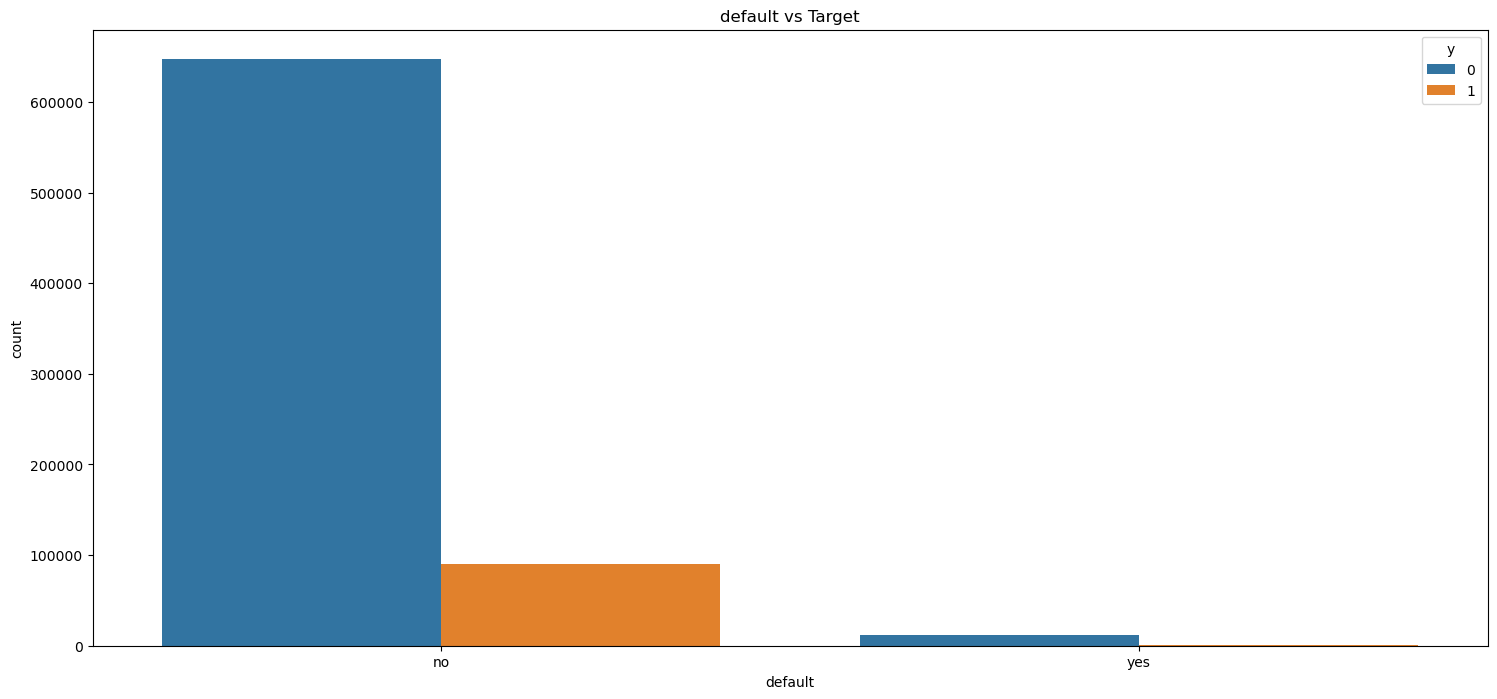

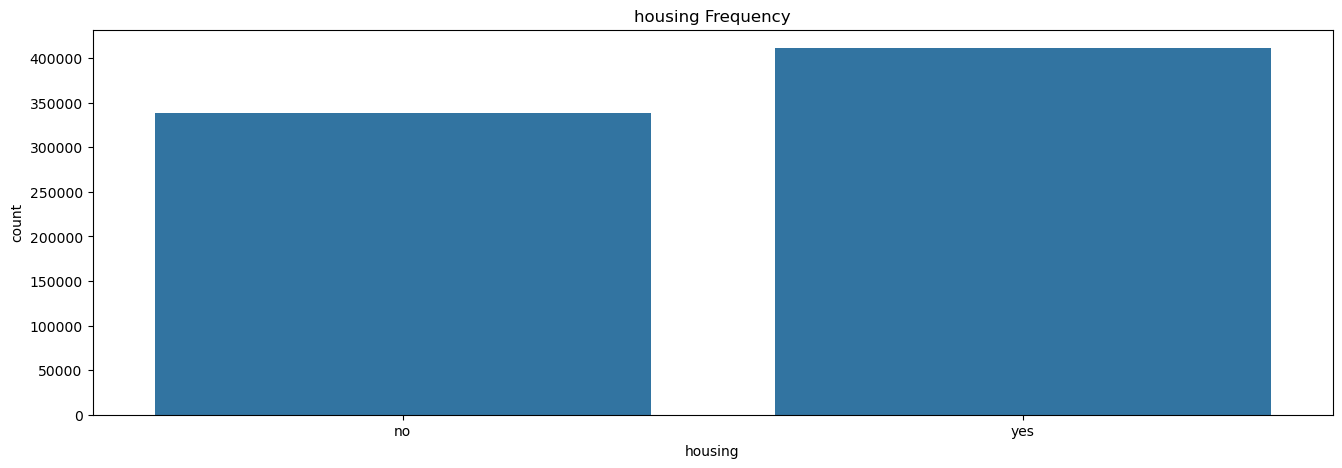

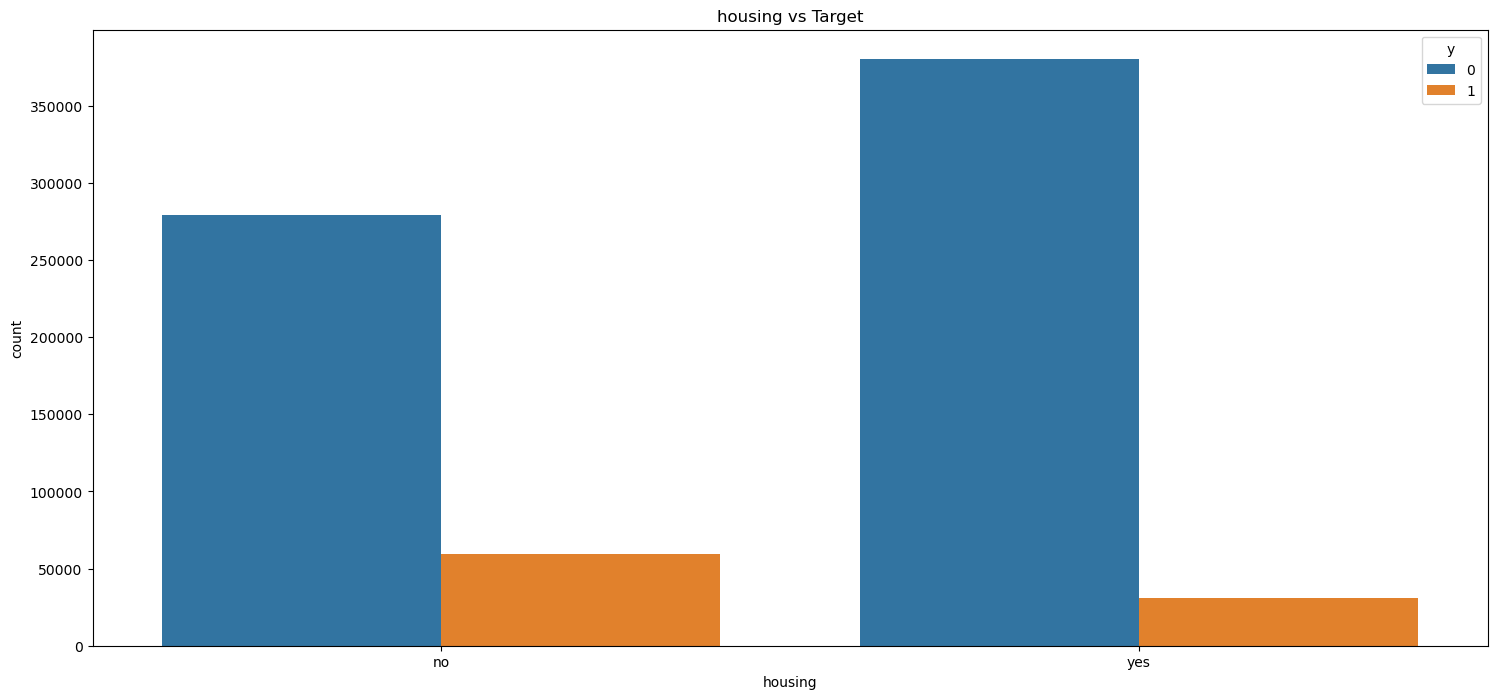

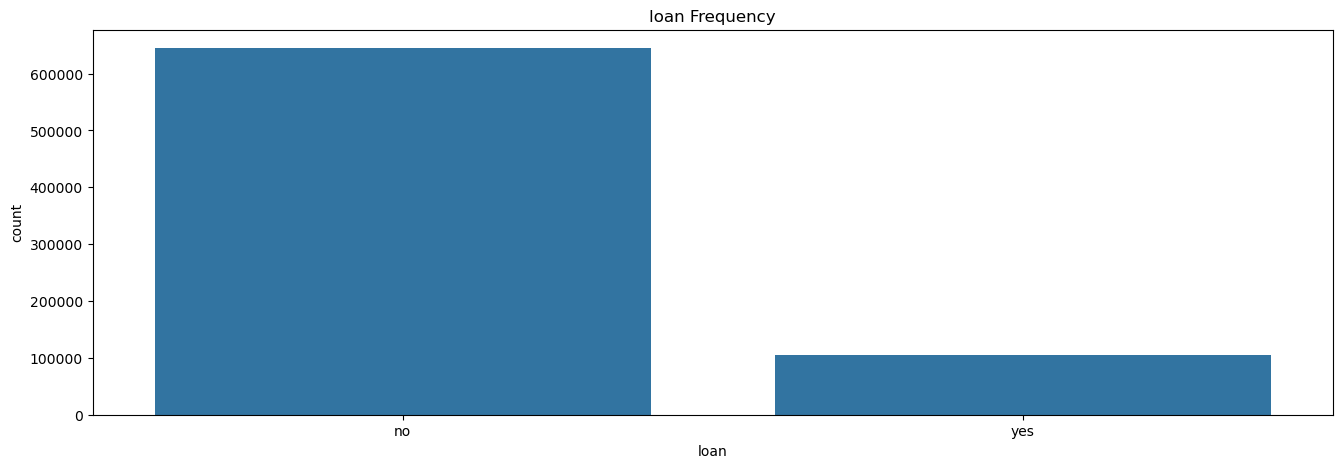

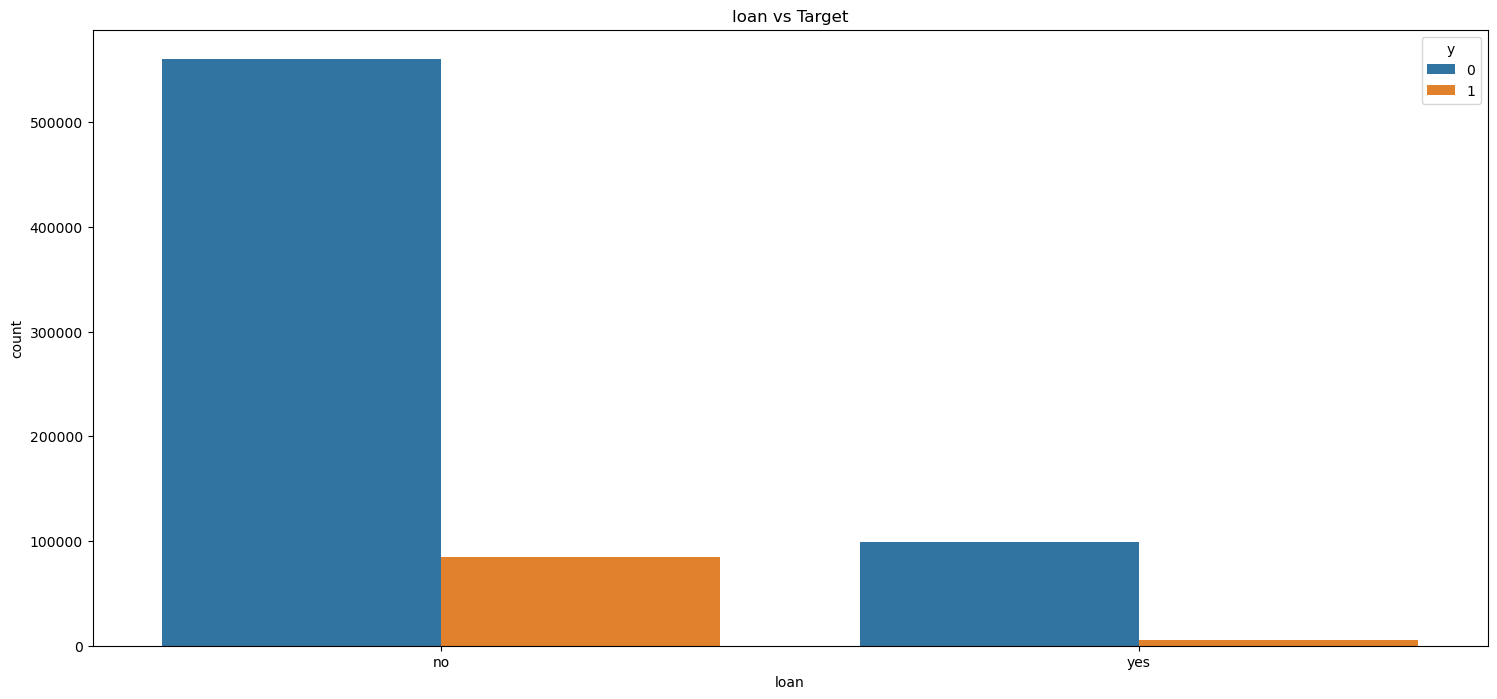

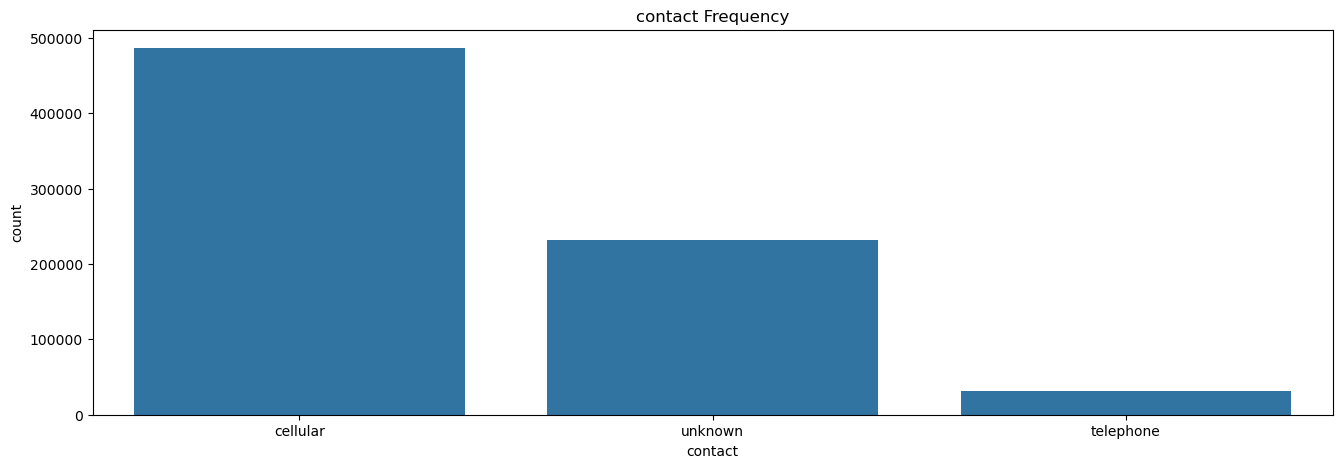

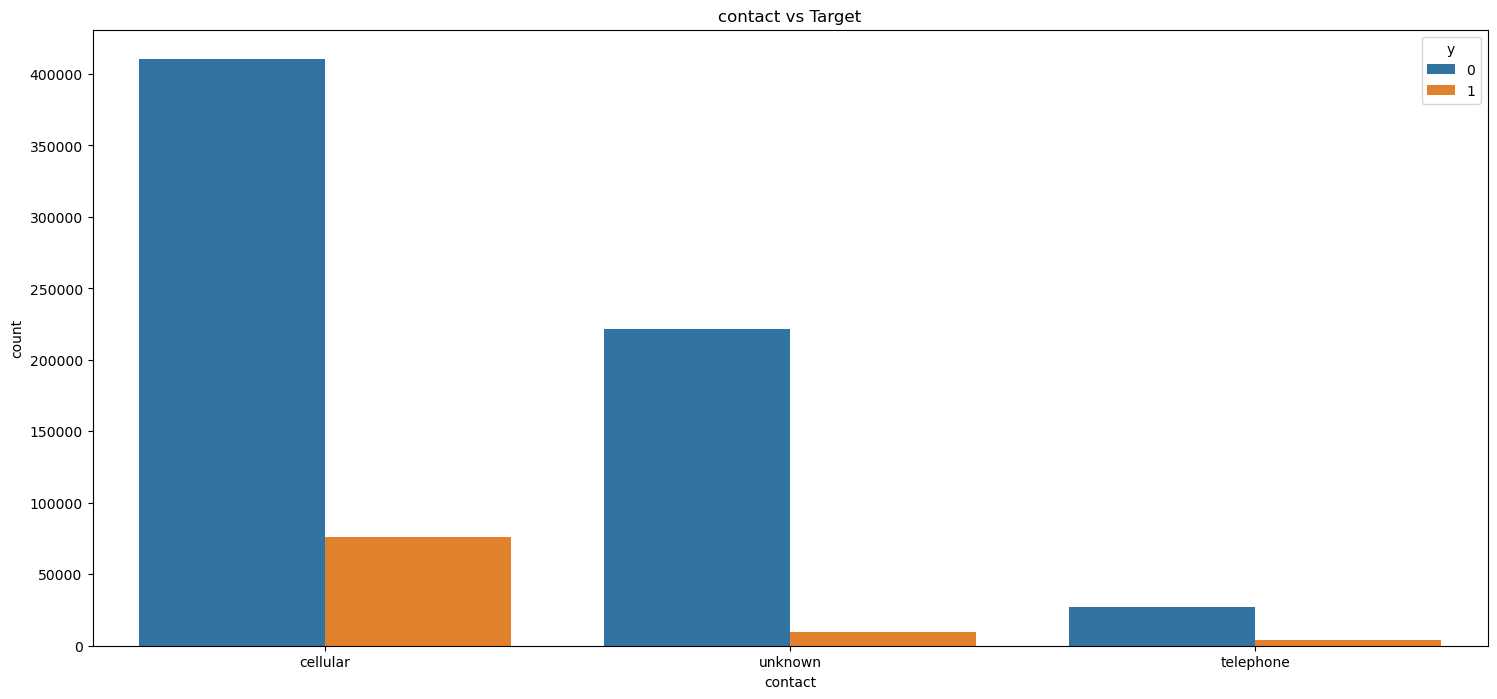

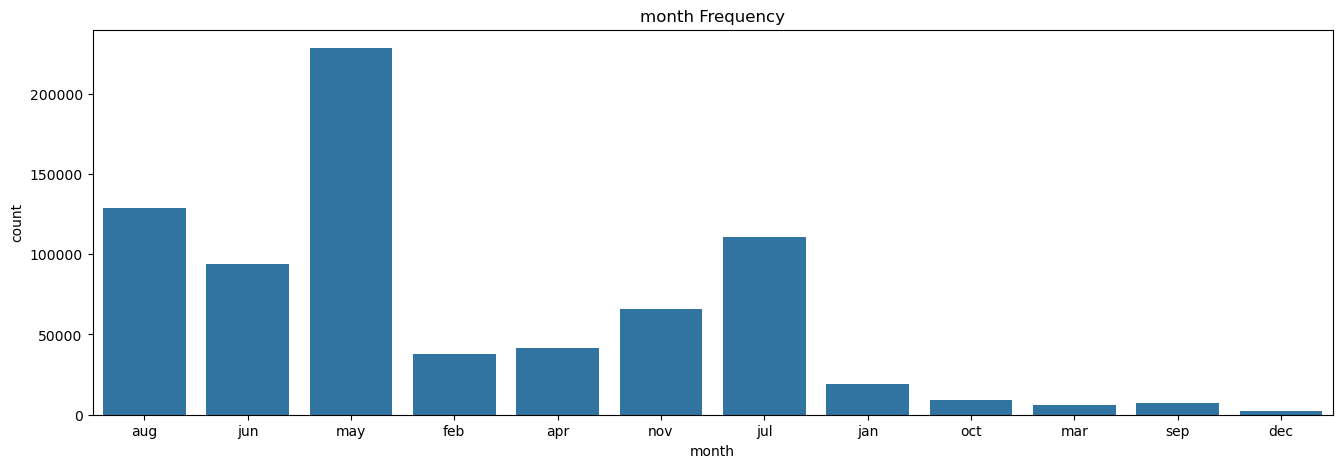

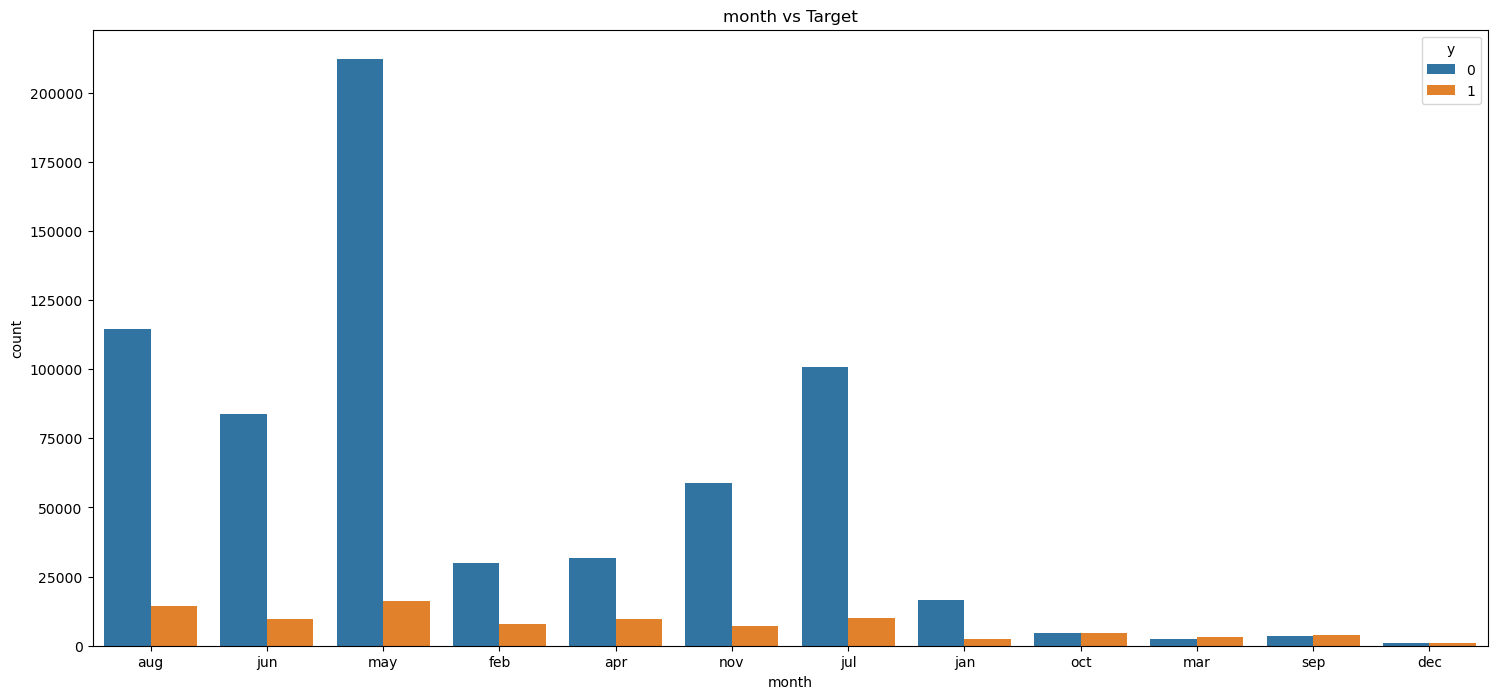

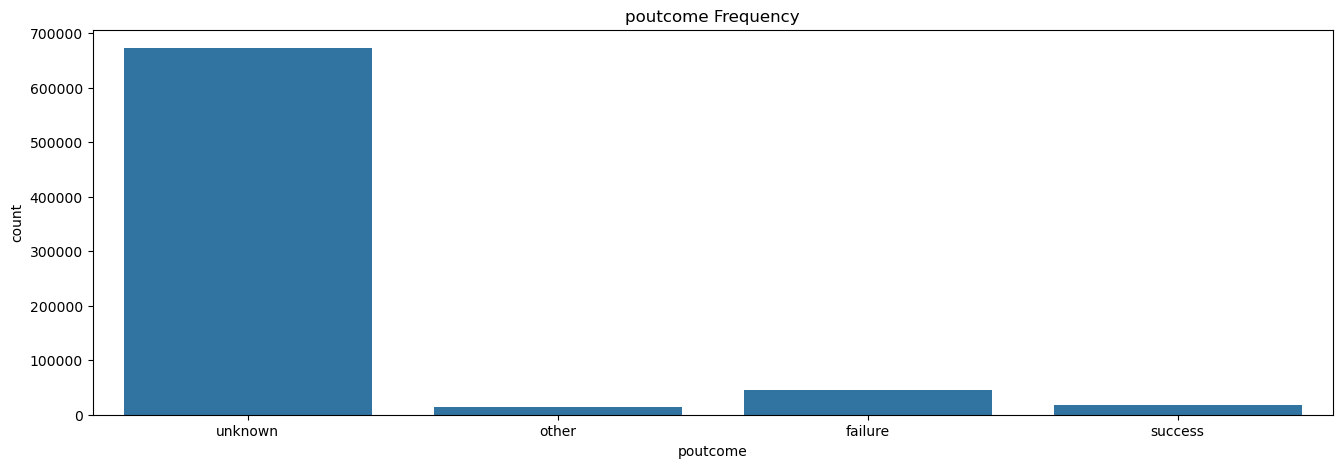

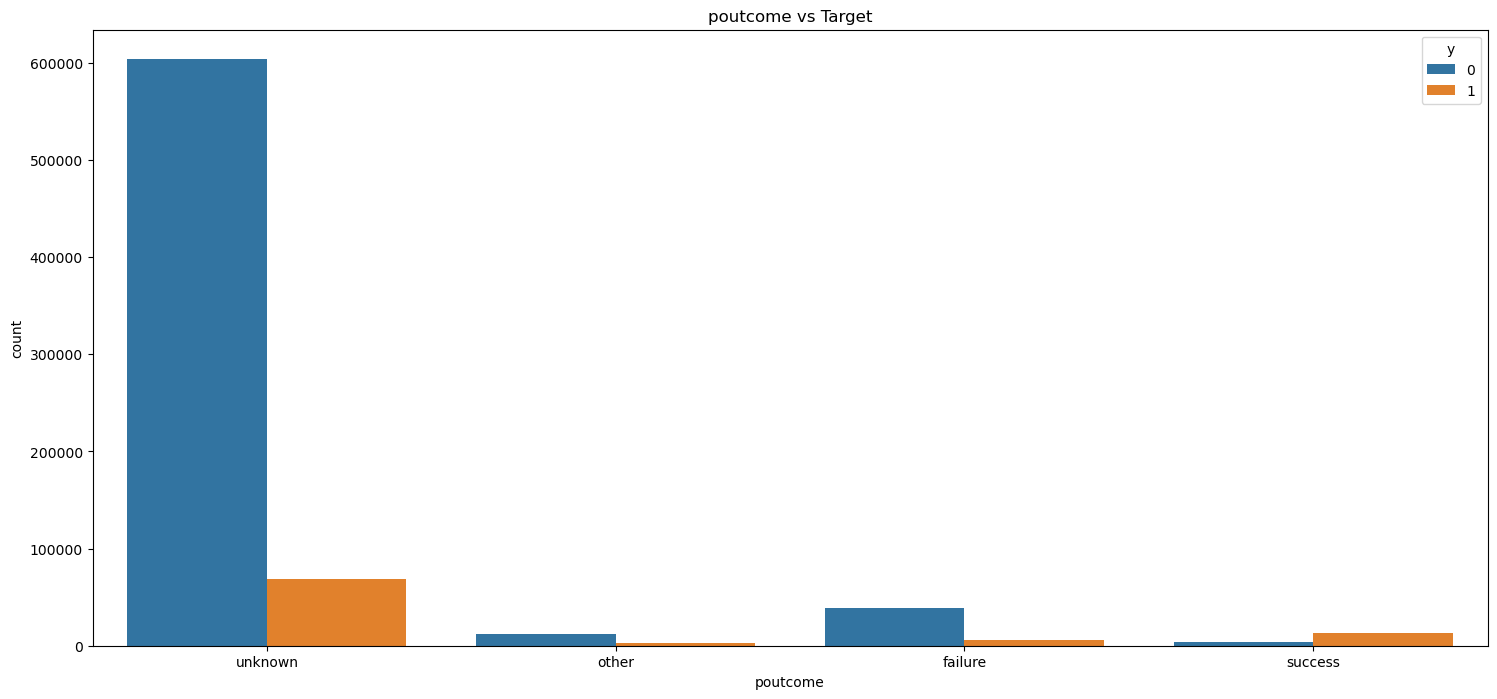

In [11]:
# categorical frequency and relation with target

for col in cat_cols:
    plt.figure(figsize = (16, 5))
    sns.countplot(x = col, data = df)
    plt.title(f"{col} Frequency")
    plt.show()

    plt.figure(figsize = (18, 8))
    sns.countplot(x= col, hue = 'y', data = df)
    plt.title(f"{col} vs Target")
    plt.show()

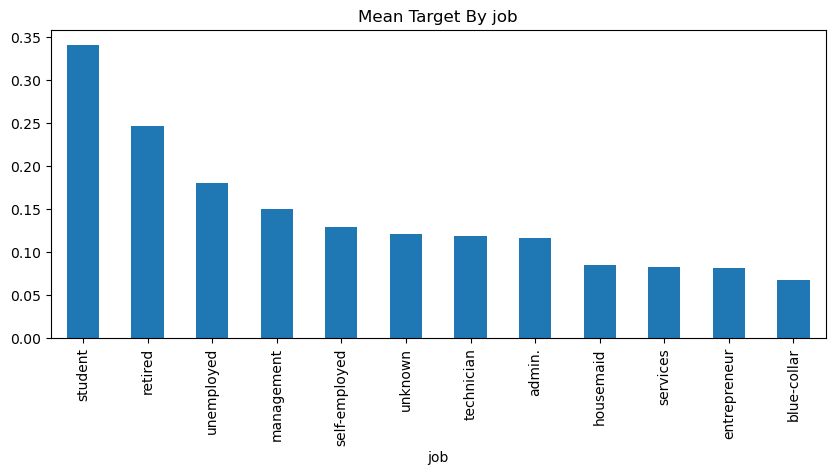

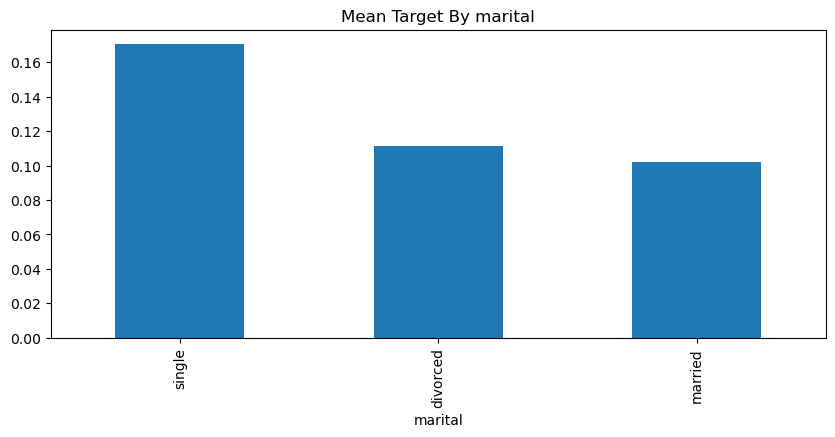

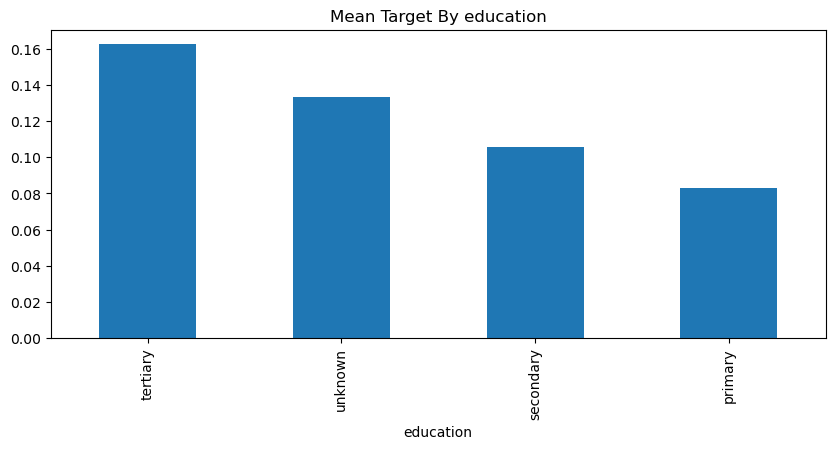

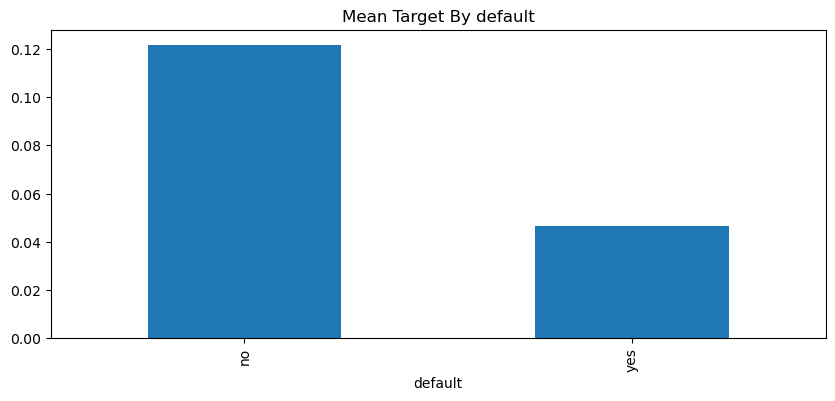

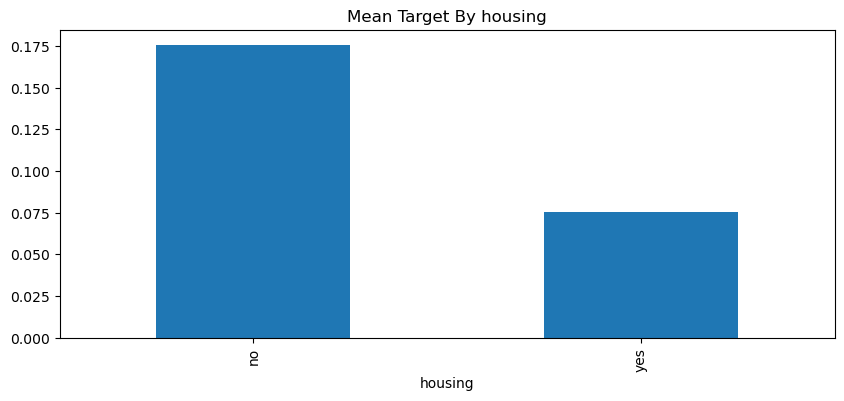

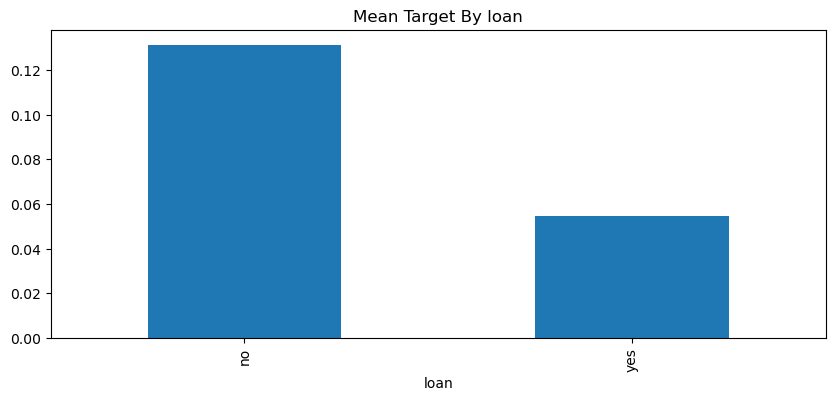

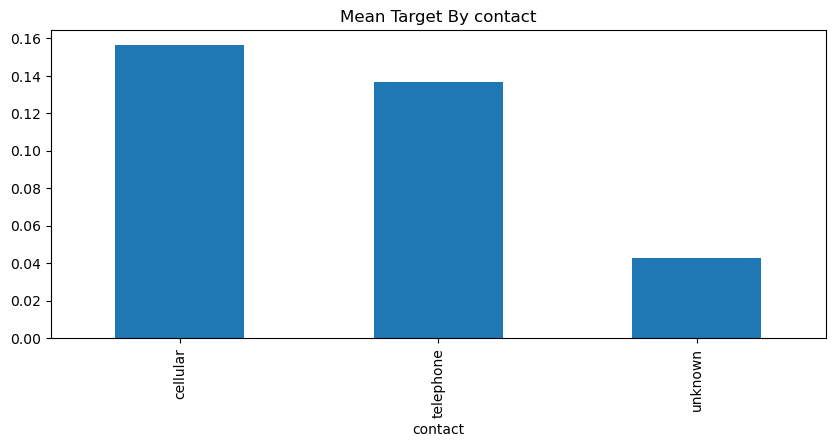

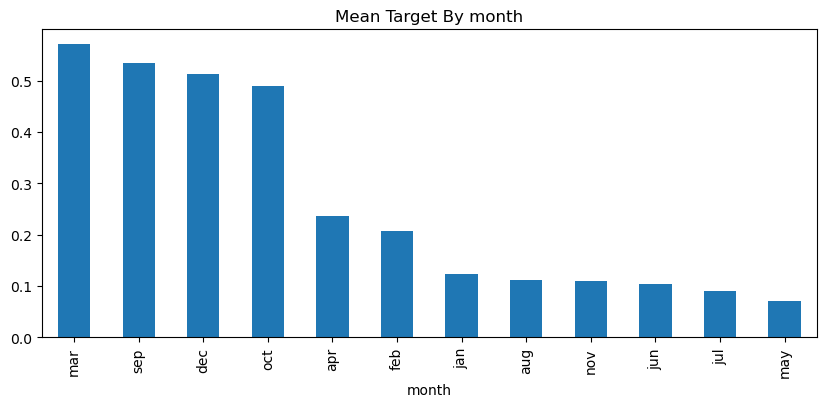

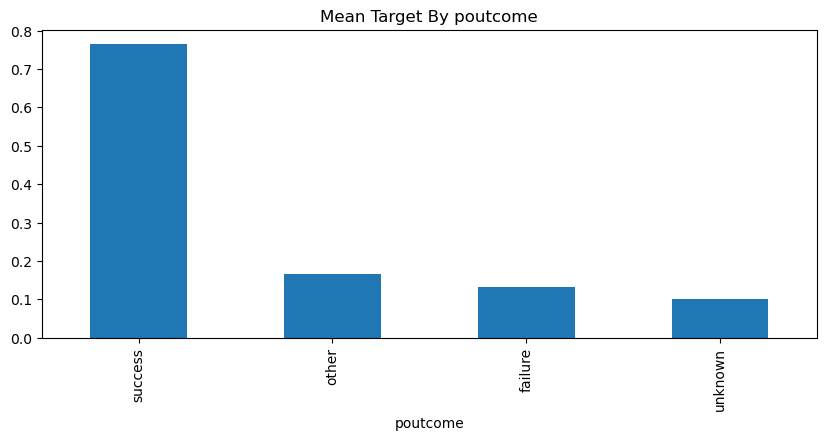

In [12]:
# Target mean plot
for col in cat_cols:
    target_rate = df.groupby(col)['y'].mean().sort_values(ascending=False)
    plt.figure(figsize = (10, 4))
    target_rate.plot(kind = 'bar')
    plt.title(f"Mean Target By {col}")
    plt.show()


In [13]:
# Numerical feature differences (t-test)

for col in num_cols:
    if col != 'y':
        col0 = df[df['y'] == 0][col] 
        col1 = df[df['y'] == 1][col]
        stat, p = ttest_ind(col0, col1)
        print(f"{col} | p-values: {p}")

age | p-values: 1.6163439694906913e-16
balance | p-values: 0.0
day | p-values: 0.0
duration | p-values: 0.0
campaign | p-values: 0.0
pdays | p-values: 0.0
previous | p-values: 0.0


In [14]:
# VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
X_vif = df[num_cols].drop('y', axis = 1)
vif_df = pd.DataFrame({
    'Feature': X_vif.columns,
    'VIF': [vif(X_vif.values, i) for i in range(X_vif.shape[1])]
})

print(vif_df)

    Feature       VIF
0       age  5.028258
1   balance  1.200825
2       day  4.191452
3  duration  1.829278
4  campaign  1.936172
5     pdays  1.582903
6  previous  1.536954


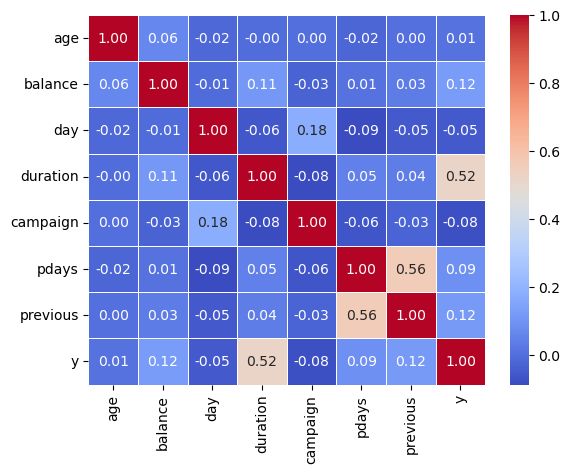

In [15]:
# Correlation
corr = df[num_cols].corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidth = 0.5)
plt.show()

### **EDA Findings**
- **Class imbalance** present → minority class ratio = ~0.0.1372 (needs SMOTE or class weights).
- **No major missing values** 
- Several numeric features are **skewed** → may need transformation for linear models.
- Outliers detected in multiple numeric features → will treat before modeling.
- Some categorical features have **clear relation** to the target.
- **No extreme multicollinearity** (VIF < 10) — safe for most models.
- age has quite the margin so will keep it in check
                                                    


## Data Preprocessing

In [16]:
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE



In [17]:
# split Features and Target

X = df.drop('y', axis = 1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y , test_size = 0.2, random_state = 42, stratify = y
)

In [18]:
X_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
385296,53,self-employed,married,secondary,no,5,yes,no,cellular,21,nov,53,1,-1,0,unknown
696342,40,entrepreneur,married,primary,no,759,no,no,cellular,20,nov,68,1,-1,0,unknown
350451,53,admin.,married,secondary,no,1473,yes,yes,cellular,20,nov,509,2,-1,0,unknown
545334,24,technician,single,secondary,no,855,yes,no,cellular,16,apr,1205,1,-1,0,unknown
138700,49,admin.,married,secondary,no,2058,no,no,cellular,30,apr,1842,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549877,37,technician,married,secondary,no,4389,yes,no,cellular,29,aug,77,2,-1,0,unknown
140612,40,management,married,tertiary,no,3158,yes,no,cellular,31,jul,126,3,-1,0,unknown
318186,34,technician,married,secondary,no,-32,no,no,cellular,11,aug,135,5,-1,0,unknown
527966,37,management,single,tertiary,no,810,yes,no,unknown,13,may,82,2,-1,0,unknown


In [19]:
from scipy.stats import zscore

for col in num_cols:
    if col!= 'y':
        skew = df[col].skew()
        if abs(skew)>1:
        # IQR
            Q1, Q3 = X_train[col].quantile([0.25, 0.75])
            IQR = Q3 - Q1
            lower, upper = Q1 - 3*IQR, Q1 + 3*IQR
            outliers = X_train[(X_train[col] < lower) & (X_train[col] > upper)]
        else:
        # Z score
            z_scores = zscore(X_train[col])
            outliers = X_train[np.abs(z_scores) > 3]

        print(f"{col}: {len(outliers)} outliers")
 

age: 3270 outliers
balance: 0 outliers
day: 0 outliers
duration: 0 outliers
campaign: 0 outliers
pdays: 0 outliers
previous: 0 outliers


In [20]:
# Outlier tratment 


for col in num_cols:
    if col!= 'y':
        skew = df[col].skew()
        if abs(skew)>1:
        # IQR
            Q1, Q3 = X_train[col].quantile([0.25, 0.75])
            IQR = Q3 - Q1
            lower, upper = Q1 - 3*IQR, Q1 + 3*IQR
            X_train[col] = X_train[col].where((X_train[col] >= lower) & (X_train[col] <= upper))
        else:
        # Z score
            z_scores = zscore(X_train[col])
            X_train[col] = X_train[col].where(np.abs(z_scores) <= 3)
        

In [21]:
X_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
385296,53.0,self-employed,married,secondary,no,5.0,yes,no,cellular,21,nov,53.0,1.0,-1.0,0.0,unknown
696342,40.0,entrepreneur,married,primary,no,759.0,no,no,cellular,20,nov,68.0,1.0,-1.0,0.0,unknown
350451,53.0,admin.,married,secondary,no,1473.0,yes,yes,cellular,20,nov,509.0,2.0,-1.0,0.0,unknown
545334,24.0,technician,single,secondary,no,855.0,yes,no,cellular,16,apr,NaN,1.0,-1.0,0.0,unknown
138700,49.0,admin.,married,secondary,no,2058.0,no,no,cellular,30,apr,NaN,1.0,-1.0,0.0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549877,37.0,technician,married,secondary,no,NaN,yes,no,cellular,29,aug,77.0,2.0,-1.0,0.0,unknown
140612,40.0,management,married,tertiary,no,3158.0,yes,no,cellular,31,jul,126.0,3.0,-1.0,0.0,unknown
318186,34.0,technician,married,secondary,no,-32.0,no,no,cellular,11,aug,135.0,5.0,-1.0,0.0,unknown
527966,37.0,management,single,tertiary,no,810.0,yes,no,unknown,13,may,82.0,2.0,-1.0,0.0,unknown


In [22]:
for col in num_cols:
    if col!= 'y':
        skew = df[col].skew()
        if abs(skew)>1:
        # IQR
            Q1, Q3 = X_train[col].quantile([0.25, 0.75])
            IQR = Q3 - Q1
            lower, upper = Q1 - 3*IQR, Q1 + 3*IQR
            outliers = X_train[(X_train[col] < lower) & (X_train[col] > upper)]
        else:
        # Z score
            z_scores = zscore(X_train[col])
            outliers = X_train[np.abs(z_scores) > 3]

        print(f"{col}: {len(outliers)} outliers")

        

age: 0 outliers
balance: 0 outliers
day: 0 outliers
duration: 0 outliers
campaign: 0 outliers
pdays: 0 outliers
previous: 0 outliers


In [23]:
# Pipelines for preprocessing

num_cols = X_train.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()

num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), 
    ('scaler', StandardScaler())
])

cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipe, num_cols), 
    ('cat', cat_pipe, cat_cols)
])

In [24]:
import os
import joblib

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

def train_base_models(X_train, y_train, preprocessor, save_dir="base_models"):
    os.makedirs(save_dir, exist_ok=True)

    models = {
        'RandomForest': RandomForestClassifier(random_state=42),
        'LogisticRegression': LogisticRegression(random_state=42),
        'KNN': KNeighborsClassifier(),
        'DecisionTree': DecisionTreeClassifier(random_state=42),
        'NaiveBayes': GaussianNB(),
        'LinearSVC': LinearSVC(random_state=42, max_iter=10000)
    }

    for name, model in models.items():
        try:
            print(f"Training {name}...")

            pipeline = Pipeline([
                ('preprocessor', preprocessor),
                ('sampler', SMOTE(random_state=42)),
                ('classifier', model)
            ])

            pipeline.fit(X_train, y_train)

            joblib.dump(pipeline, os.path.join(save_dir, f"{name}.joblib"))
            print(f"{name} saved successfully!\n")
        
        except Exception as e:
            print(f"❌ Failed to train {name}: {e}\n")




Training RandomForest...
RandomForest training complete.

Training LogisticRegression...
LogisticRegression training complete.

Training KNN...
KNN training complete.

Training DecisionTree...
DecisionTree training complete.

Training NaiveBayes...
NaiveBayes training complete.

